In [1]:
#pip install flaml

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np   
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split #, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
from flaml import AutoML
from flaml.data import get_output_from_log

In [3]:
import sys
sys.path.append("../")
import pandas as pd
from utils.data_utils import DataLoader

In [4]:
data_loader = DataLoader(file_path='../data/raw/Churn_Modelling.xls' , target_column='Exited', test_size=0.2, random_state=42, clean_data=True)

In [5]:
data_loader.data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
X, y = data_loader.get_data()

In [15]:
X_train, y_train = data_loader.get_train_data()
X_test, y_test = data_loader.get_test_data()

In [16]:
automl = AutoML()
automl_settings = {
    "time_budget": 200,
    "metric": 'roc_auc',
    "task": 'classification',
    "log_file_name": 'automl.log',
    "model_history": True,
}

In [17]:
automl.fit(X_train=X_train, y_train=y_train, dataframe=data_loader, **automl_settings)

[flaml.automl.logger: 05-28 12:15:11] {1682} INFO - task = classification
[flaml.automl.logger: 05-28 12:15:11] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 05-28 12:15:11] {1692} INFO - Evaluation method: cv
[flaml.automl.logger: 05-28 12:15:11] {1790} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 05-28 12:15:11] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 05-28 12:15:11] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-28 12:15:11] {2336} INFO - Estimated sufficient time budget=2107s. Estimated necessary time budget=52s.
[flaml.automl.logger: 05-28 12:15:11] {2383} INFO -  at 0.4s,	estimator lgbm's best error=0.1904,	best estimator lgbm's best error=0.1904
[flaml.automl.logger: 05-28 12:15:11] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-28 12:15:12] {2383} INFO -  at 0.6s,	estimator lgbm's 

In [18]:
best_model = automl.model
best_score = automl.best_loss
print(best_model)
print(best_score)

0.13090579979670405


In [19]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.2, 'n_estimators': 47}
Best accuracy on validation data: 0.8691
Training duration of best run: 3.249 s


In [20]:
automl.model.estimator

In [21]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=automl_settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 7893, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 7893, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alpha': 0.001348364934537134, 'reg_lambda': 1.4442580148221913}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_a

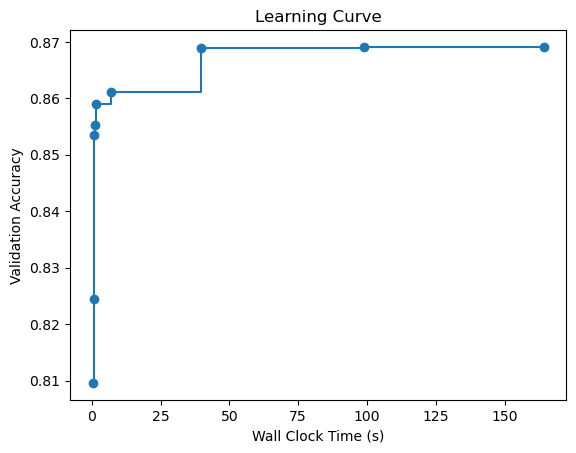

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()